# **Import the libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# **Reading the data**

In [ ]:
df = pd.read_csv('student_evaluation.csv')
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
#Statistical summary
df.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,3.107388,3.066323,3.041924,3.165979,3.090722,3.183849,3.035567,3.242784,3.290893,3.287285,3.169588,3.398454,3.222509,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,1.280807,1.279097,1.283481,1.268930,1.275309,1.295443,1.305772,1.264201,1.255373,1.253122,1.288015,1.267530,1.279799,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
#Checking for Null values if any
df.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

In [ ]:
#Starting the initial value of clusters as 2
km= KMeans(n_clusters=2)
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
pred = km.predict(df)

In [ ]:
#Determination of the count of variables
pd.Series(pred).value_counts()

0    3148
1    2672
dtype: int64

In [ ]:
#Determine the inertia
km.inertia_

231353.7586857733

In [ ]:
km.score(df)

-231353.75868577306

In [ ]:
#Finding the differnt k values
SSE = []
for k in range(1,20):
  km = KMeans(n_jobs=-1, n_clusters=k)
  km.fit(df)
  SSE.append(km.inertia_)

SSE

[373025.67285223363,
 231353.7586857733,
 180375.76659547855,
 152888.20644079396,
 133015.6157763964,
 119620.25246354294,
 112463.8763555702,
 105894.59697825846,
 101332.4900468311,
 97524.95485673069,
 94170.1340222299,
 91515.92334555982,
 89254.86030134151,
 87710.51954649754,
 86404.04872588193,
 84526.28134180162,
 83671.32313545413,
 82062.04121836412,
 80963.51819089464]

In [ ]:
#Storing the data in a DataFrame
frame = pd.DataFrame({'Clusters': range(1,20), 'SSE' :SSE })
frame

,Clusters,SSE
0,1,373025.672852
1,2,231353.758686
2,3,180375.766595
3,4,152888.145973
4,5,133016.516186
5,6,119620.319351
6,7,112464.030864
7,8,105894.822450
8,9,101318.571428
9,10,97525.567360


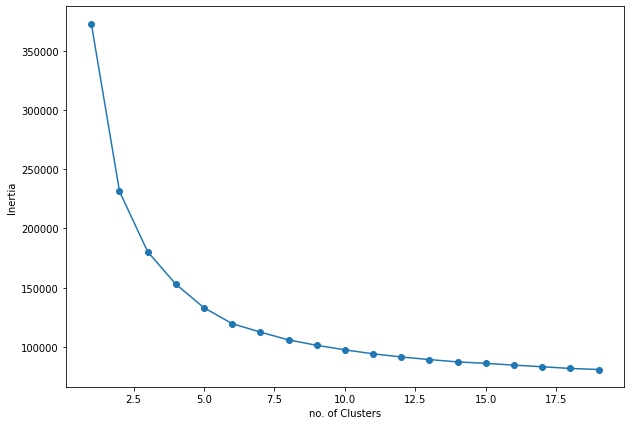

In [ ]:
#Plotting the Elbow Curve
plt.figure(figsize=(10,7))
plt.plot(frame.Clusters, frame.SSE, marker='o')
plt.xlabel('no. of Clusters')
plt.ylabel('Inertia')
plt.show()

# **We Forgot the scale the data, so repeat the same process by scaling the data**

In [ ]:
#Data Normalization
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data = ss.fit_transform(df)

In [ ]:
pd.DataFrame(data)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,-2.06785,-1.430719,-0.402174,-1.136118,0.901862,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
1,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
2,-2.06785,-1.430719,-0.402174,0.219954,0.901862,1.543745,1.498760,1.453023,1.492837,1.481107,1.477798,1.511882,1.525729,1.445452,1.497239,1.402075,1.504551,1.390102,1.361550,1.366876,1.421233,1.263627,1.389003,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265
3,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
4,-2.06785,-1.430719,-0.402174,-1.136118,-1.322221,-1.439189,-1.613740,-1.738145,-1.621254,-1.646630,-1.645501,-1.615594,-1.591064,-1.707080,-1.639525,-1.685938,-1.559033,-1.774225,-1.825028,-1.825426,-1.684588,-1.892390,-1.736757,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,0.71607,1.552042,-0.402174,-1.136118,-1.322221,-1.439189,-1.613740,-1.738145,-1.621254,-1.646630,-1.645501,-1.615594,-1.591064,-1.707080,-1.639525,-1.685938,-1.559033,-1.774225,-1.825028,-1.825426,-1.684588,-1.892390,-1.736757,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160
5816,0.71607,1.552042,-0.402174,0.897990,0.901862,0.798012,0.720635,0.655231,0.714315,0.699173,0.696973,0.730013,0.746531,0.657319,0.713048,0.630071,1.504551,1.390102,1.361550,1.366876,1.421233,1.263627,1.389003,1.370552,1.342957,1.332907,1.326612,0.627208,1.436873,1.342258,1.399225,1.428430,1.323265
5817,0.71607,1.552042,-0.402174,-1.136118,0.901862,1.543745,1.498760,1.453023,1.492837,1.481107,1.477798,1.511882,1.525729,1.445452,1.497239,1.402075,1.504551,1.390102,1.361550,1.366876,1.421233,1.263627,1.389003,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265
5818,0.71607,1.552042,-0.402174,-0.458082,-0.580860,-1.439189,-1.613740,-1.738145,-1.621254,-1.646630,-1.645501,-1.615594,-1.591064,-1.707080,-1.639525,-1.685938,-1.559033,-1.774225,-1.825028,-1.825426,-1.684588,-1.892390,-1.736757,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160


In [ ]:
SSE_scaled = []

for k in range(1,20):
  km = KMeans(n_jobs= -1, n_clusters=k)
  km.fit(x)
  SSE_scaled.append(km.inertia_)

In [ ]:
frame_scaled = pd.DataFrame({'Clusters': range(1,20), 'SSE' :SSE })
frame_scaled

,Clusters,SSE
0,1,373025.672852
1,2,231353.758686
2,3,180375.766595
3,4,152888.145973
4,5,133016.516186
5,6,119620.319351
6,7,112464.030864
7,8,105894.822450
8,9,101318.571428
9,10,97525.567360


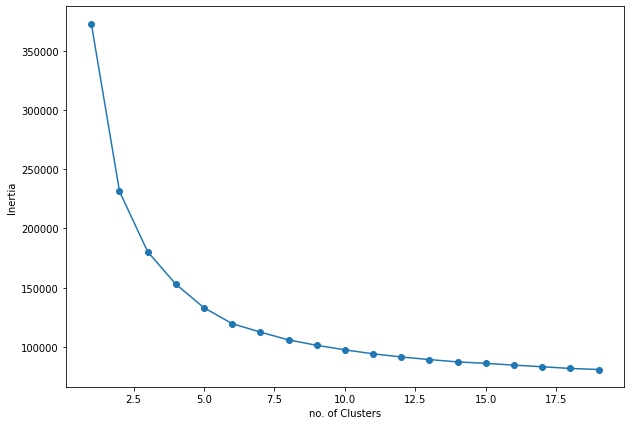

   From the above graph we can observe the the ideal value of k lies between 3.0 & 5.0


In [ ]:
plt.figure(figsize=(10,7))
plt.plot(frame_scaled.Clusters, frame_scaled.SSE, marker='o')
plt.xlabel('no. of Clusters')
plt.ylabel('Inertia')
plt.show()


print(' \033[1m \033[94m From the above graph we can observe the the ideal value of k lies between 3.0 & 5.0')

In [ ]:
#Predicting the values using k = 4
km = KMeans(n_jobs= -1, n_clusters=4)
km.fit(data)
pred = km.predict(data)

In [ ]:
pred

array([0, 0, 1, ..., 1, 3, 3], dtype=int32)

In [ ]:
dataframe = pd.DataFrame(data)
dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,-2.06785,-1.430719,-0.402174,-1.136118,0.901862,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
1,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
2,-2.06785,-1.430719,-0.402174,0.219954,0.901862,1.543745,1.498760,1.453023,1.492837,1.481107,1.477798,1.511882,1.525729,1.445452,1.497239,1.402075,1.504551,1.390102,1.361550,1.366876,1.421233,1.263627,1.389003,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265
3,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
4,-2.06785,-1.430719,-0.402174,-1.136118,-1.322221,-1.439189,-1.613740,-1.738145,-1.621254,-1.646630,-1.645501,-1.615594,-1.591064,-1.707080,-1.639525,-1.685938,-1.559033,-1.774225,-1.825028,-1.825426,-1.684588,-1.892390,-1.736757,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,0.71607,1.552042,-0.402174,-1.136118,-1.322221,-1.439189,-1.613740,-1.738145,-1.621254,-1.646630,-1.645501,-1.615594,-1.591064,-1.707080,-1.639525,-1.685938,-1.559033,-1.774225,-1.825028,-1.825426,-1.684588,-1.892390,-1.736757,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160
5816,0.71607,1.552042,-0.402174,0.897990,0.901862,0.798012,0.720635,0.655231,0.714315,0.699173,0.696973,0.730013,0.746531,0.657319,0.713048,0.630071,1.504551,1.390102,1.361550,1.366876,1.421233,1.263627,1.389003,1.370552,1.342957,1.332907,1.326612,0.627208,1.436873,1.342258,1.399225,1.428430,1.323265
5817,0.71607,1.552042,-0.402174,-1.136118,0.901862,1.543745,1.498760,1.453023,1.492837,1.481107,1.477798,1.511882,1.525729,1.445452,1.497239,1.402075,1.504551,1.390102,1.361550,1.366876,1.421233,1.263627,1.389003,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265
5818,0.71607,1.552042,-0.402174,-0.458082,-0.580860,-1.439189,-1.613740,-1.738145,-1.621254,-1.646630,-1.645501,-1.615594,-1.591064,-1.707080,-1.639525,-1.685938,-1.559033,-1.774225,-1.825028,-1.825426,-1.684588,-1.892390,-1.736757,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160


In [ ]:
dataframe['cluster'] = pred


In [ ]:
dataframe['cluster'].value_counts()

0    2098
2    1670
3    1196
1     856
Name: cluster, dtype: int64

In [ ]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,cluster
0,-2.06785,-1.430719,-0.402174,-1.136118,0.901862,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,0
1,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,0
2,-2.06785,-1.430719,-0.402174,0.219954,0.901862,1.543745,1.49876,1.453023,1.492837,1.481107,1.477798,1.511882,1.525729,1.445452,1.497239,1.402075,1.504551,1.390102,1.361550,1.366876,1.421233,1.263627,1.389003,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265,1
3,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,0
4,-2.06785,-1.430719,-0.402174,-1.136118,-1.322221,-1.439189,-1.61374,-1.738145,-1.621254,-1.646630,-1.645501,-1.615594,-1.591064,-1.707080,-1.639525,-1.685938,-1.559033,-1.774225,-1.825028,-1.825426,-1.684588,-1.892390,-1.736757,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160,3
